In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

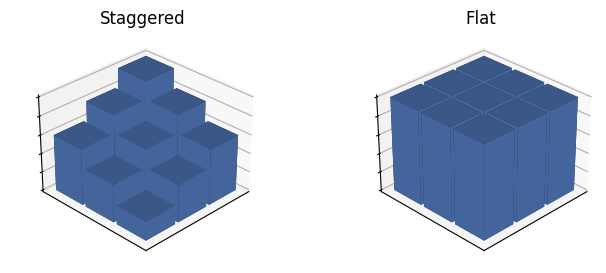

In [3]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

linear_x = np.arange(3)
linear_y = np.arange(3)
xx, yy = np.meshgrid(linear_x, linear_y)
x = xx.ravel()
y = yy.ravel()

staggered_height = x + y + 1
flat_height = np.full_like(x, 1.0)
bottom = np.zeros_like(x)
width = 0.9
depth = 0.9

ax1.bar3d(x, y, bottom, width, depth, staggered_height, shade=True)
ax1.view_init(30, -135)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Staggered")

ax2.bar3d(x, y, bottom, width, depth, flat_height, shade=True)
ax2.view_init(30, -135)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Flat")

plt.show()

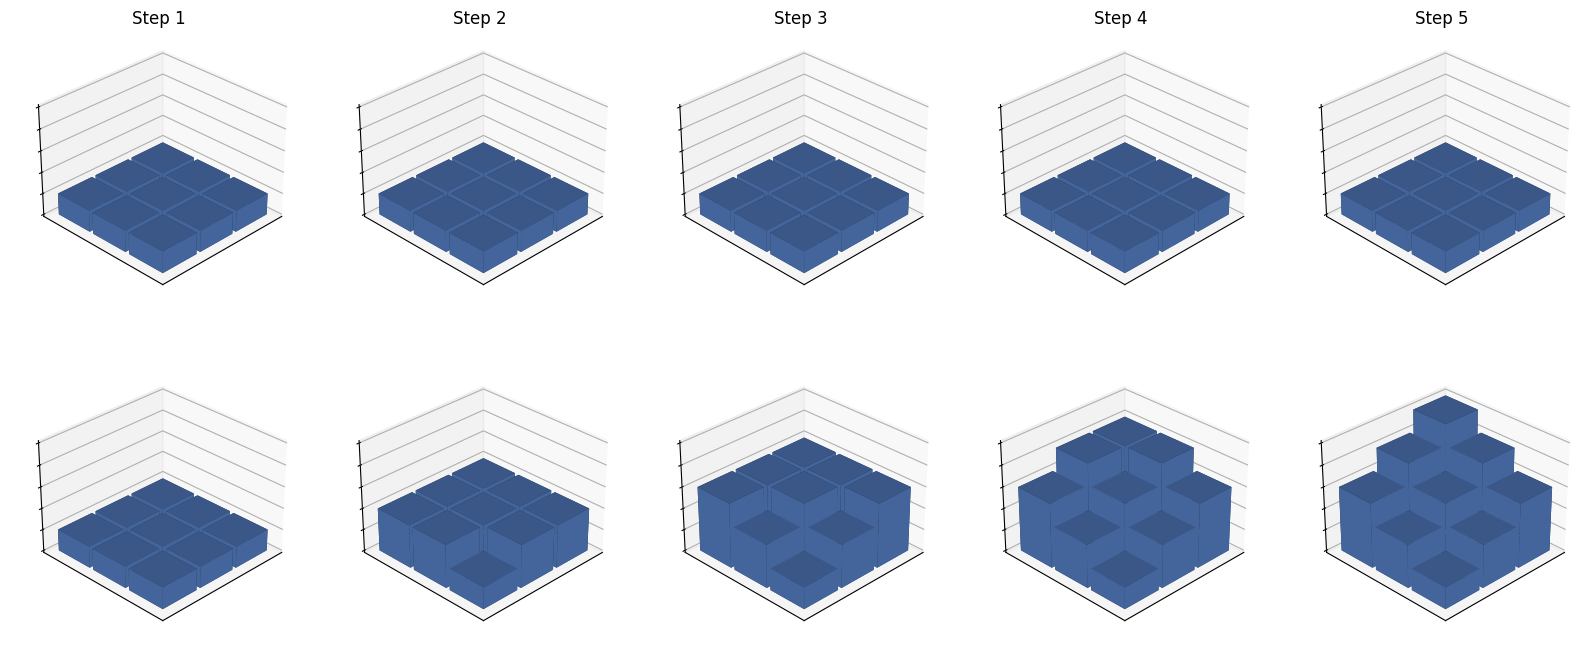

In [26]:
fig = plt.figure(figsize=(20, 8))
sync_index = 0
async_index = 1
axs = [[], []]
for i in [sync_index, async_index]:
    for j in range(5):
        index = i * 5 + (j + 1)
        axs[i].append(fig.add_subplot(2, 5, index, projection="3d"))

linear_x = np.arange(3)
linear_y = np.arange(3)
xx, yy = np.meshgrid(linear_x, linear_y)
x = xx.ravel()
y = yy.ravel()

height1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]).ravel()
height2 = np.array([[1, 2, 2], [2, 2, 2], [2, 2, 2]]).ravel()
height3 = np.array([[1, 2, 3], [2, 3, 3], [3, 3, 3]]).ravel()
height4 = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 4]]).ravel()
height5 = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]]).ravel()
bottom = np.zeros_like(x)
width = 0.9
depth = 0.9


def format_plot(ax, index: int, set_title: bool):
    ax.view_init(30, -135)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zlim(0, 5)
    if set_title:
      ax.set_title(f"Step {index}")


def plot_async(height, index: int):
    axs[async_index][index - 1].bar3d(x, y, bottom, width, depth, height, shade=True)
    format_plot(axs[async_index][index - 1], index, False)


def plot_sync(index: int):
    height = np.full_like(x, 1)
    axs[sync_index][index - 1].bar3d(x, y, bottom, width, depth, height, shade=True)
    format_plot(axs[sync_index][index - 1], index, True)


for i in range(5):
    plot_sync(i + 1)
plot_async(height1, 1)
plot_async(height2, 2)
plot_async(height3, 3)
plot_async(height4, 4)
plot_async(height5, 5)

plt.show()